In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Diabetes predicition using Logistic Regression

In [ ]:
from google.colab import files
files.upload()

Saving diabetes.csv to diabetes (1).csv


{'diabetes (1).csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.25

In [ ]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no missing values in the dataset.

In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

Outcome is categorical while other are continous.

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


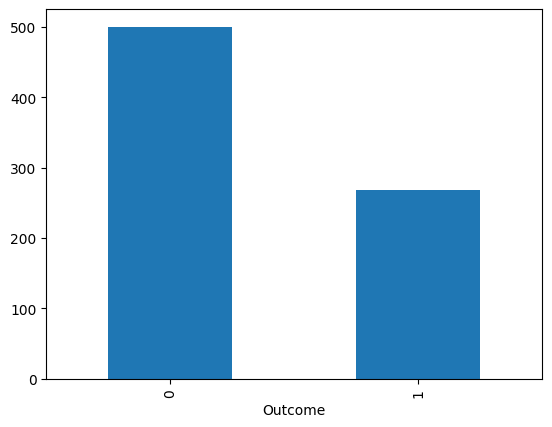

In [ ]:
diabetes_df["Outcome"].value_counts().plot(kind='bar')
plt.show()

In [ ]:
diabetes_df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

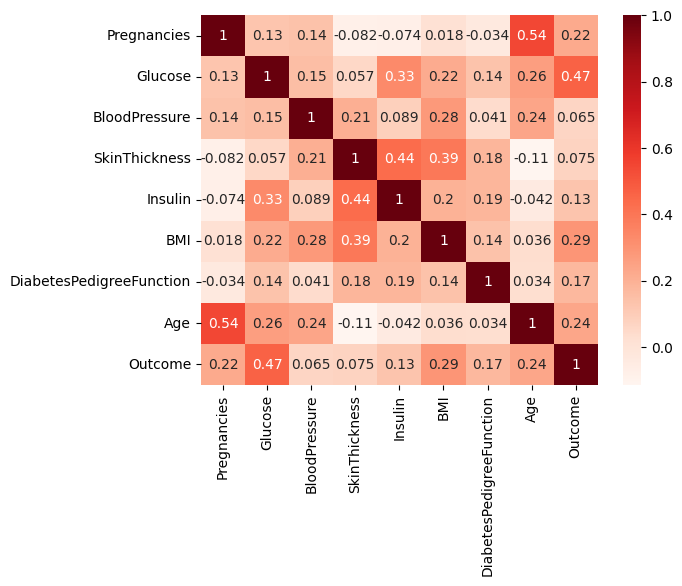

In [ ]:
sns.heatmap(diabetes_df.corr(), annot=True, cmap='Reds')
plt.show()

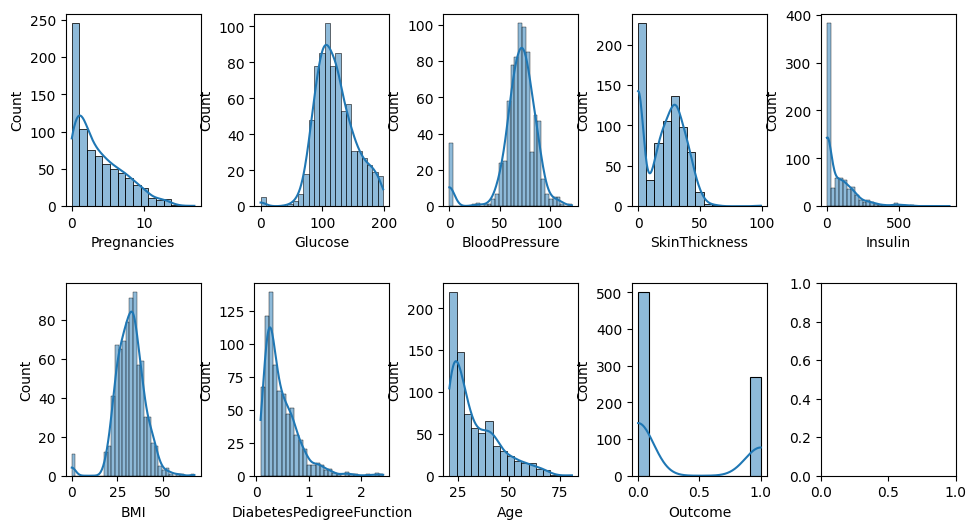

In [ ]:
n_cols = int(len(diabetes_df.columns) / 2) + 1
fig, axes = plt.subplots(2, n_cols, figsize=(10, 6))
axes = axes.flatten()
for i, col in enumerate(diabetes_df.columns):
  sns.histplot(diabetes_df[col], ax=axes[i], kde=True)


plt.subplots_adjust(wspace=0.4, hspace=0.4, left=0.01)
plt.show()


In [ ]:
for col in diabetes_df.columns:
  print(col, diabetes_df[col].skew())

Pregnancies 0.9016739791518588
Glucose 0.17375350179188992
BloodPressure -1.8436079833551302
SkinThickness 0.10937249648187608
Insulin 2.272250858431574
BMI -0.42898158845356543
DiabetesPedigreeFunction 1.919911066307204
Age 1.1295967011444805
Outcome 0.635016643444986


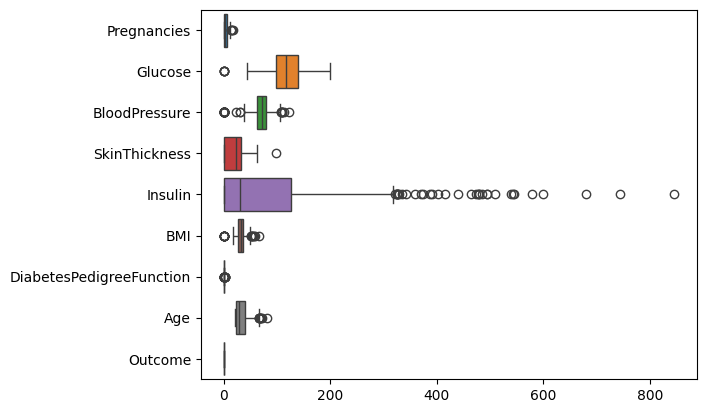

In [ ]:
sns.boxplot(diabetes_df, orient='h')
plt.show()

Except 'Glucose' and 'Outcome' each variable is skewed and insulin has too much outliers.

In [ ]:
cols_to_transform = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
scaler = StandardScaler()
diabetes_df[cols_to_transform] = scaler.fit_transform(diabetes_df[cols_to_transform])

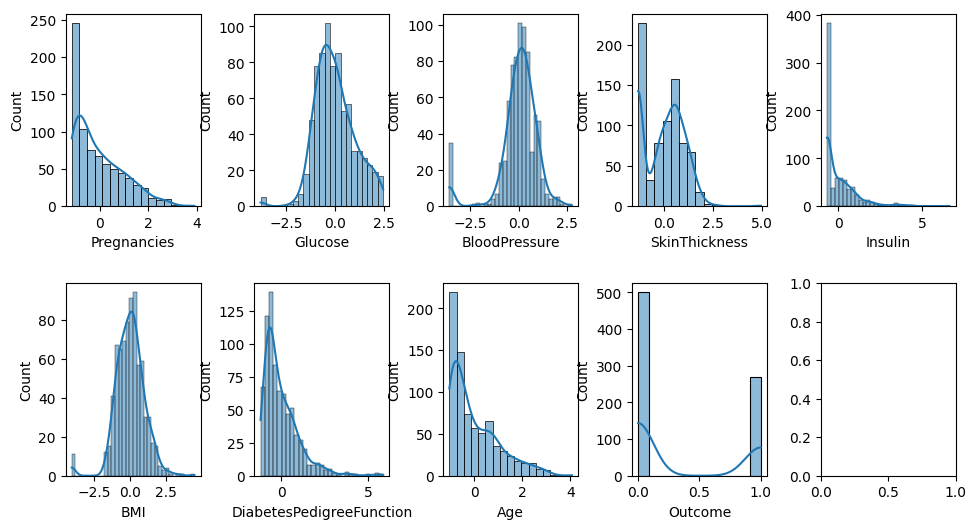

In [ ]:
n_cols = int(len(diabetes_df.columns) / 2) + 1
fig, axes = plt.subplots(2, n_cols, figsize=(10, 6))
axes = axes.flatten()
for i, col in enumerate(diabetes_df.columns):
  sns.histplot(diabetes_df[col], ax=axes[i], kde=True)


plt.subplots_adjust(wspace=0.4, hspace=0.4, left=0.01)
plt.show()

Features are now scaled.

In [ ]:
X = diabetes_df.drop("Outcome", axis=1)
y = diabetes_df['Outcome']

In [28]:
def train_and_evaluate(model, features, target):
  X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  f1 = f1_score(y_test, y_pred, average='micro')
  recall = recall_score(y_test, y_pred, average='micro')
  precision = precision_score(y_test, y_pred, average='micro')

  print(f"Accuracy of the {model} is: {(accuracy * 100):.2f}%")
  print(f"Recall of the {model} is: {(recall * 100):.2f}%")
  print(f"Precision of the {model} is: {(precision * 100):.2f}%")
  print(f"F1 Score of the {model} is: {(f1 * 100):.2f}%")


In [24]:
from sklearn.linear_model import LogisticRegression
linear_regression_model = LogisticRegression()

In [ ]:
train_and_evaluate(linear_regression_model, X, y)

Accuracy of the LogisticRegression() is: 77.92%
Recall of the LogisticRegression() is: 56.98%
Precision of the LogisticRegression() is: 77.78%
F1 Score of the LogisticRegression() is: 65.77%


# Iris Species Classification using Decision Trees

In [ ]:
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris_df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

There are no missing values in the dataset.

In [ ]:
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Each feature is numeric except our target('species').

In [ ]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


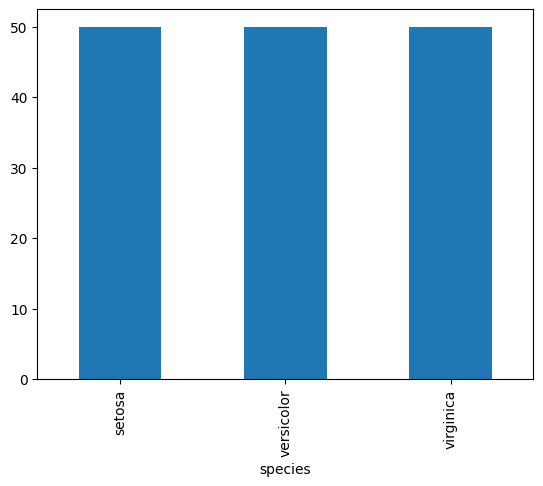

In [ ]:
iris_df["species"].value_counts().plot(kind='bar')
plt.show()

In [ ]:
iris_df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Target variable is perfectly balanced.

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
iris_df['species'] = encoder.fit_transform(iris_df['species'])
iris_df['species'].head()

In [ ]:
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object

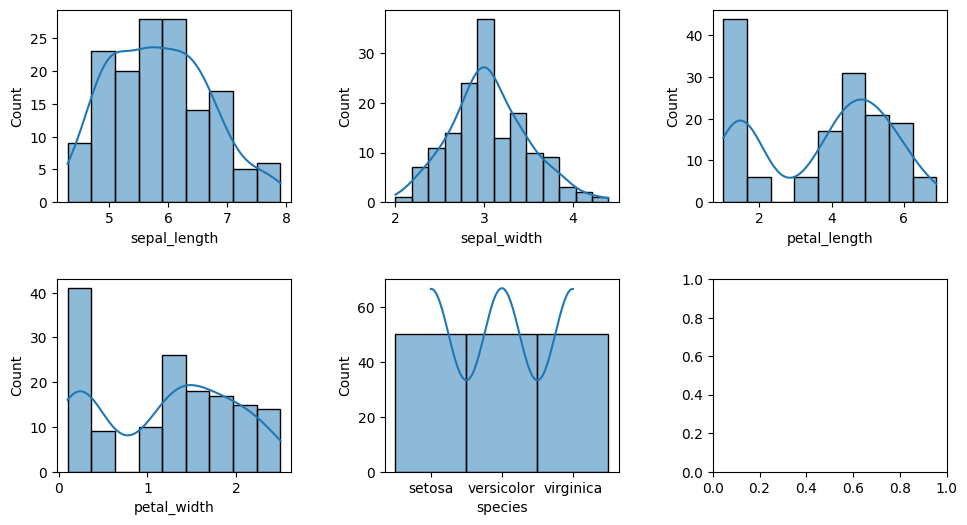

In [ ]:
n_cols = int(len(iris_df.columns) / 2) + 1
fig, axes = plt.subplots(2, n_cols, figsize=(10, 6))
axes = axes.flatten()
for i, col in enumerate(iris_df.columns):
  sns.histplot(iris_df[col], ax=axes[i], kde=True)


plt.subplots_adjust(wspace=0.4, hspace=0.4, left=0.01)
plt.show()

In [ ]:
iris_df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.117570,0.871754,0.817941,NaN
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,NaN
petal_length,0.871754,-0.428440,1.000000,0.962865,NaN
petal_width,0.817941,-0.366126,0.962865,1.000000,NaN
species,NaN,NaN,NaN,NaN,NaN


In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
X_iris = iris_df.drop('species', axis=1)
y_iris = iris_df['species']

In [ ]:
train_and_evaluate(decision_tree_model, X_iris, y_iris)

Accuracy of the DecisionTreeClassifier() is: 95.56%
Recall of the DecisionTreeClassifier() is: 95.56%
Precision of the DecisionTreeClassifier() is: 95.56%
F1 Score of the DecisionTreeClassifier() is: 95.56%


The model is 95% accurate.

# Predicting Titanic Survival Using Logistic Regression

In [ ]:
from google.colab import files
files.upload()

Saving titanic.csv to titanic.csv


{'titanic.csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S\n13,0,3,"Saundercock, Mr

In [ ]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


There are 687 values in the 'Cabin' column so it is good to drop the column, the missing values in 'Age' and 'Embarked' can be imputed.

In [ ]:
titanic_df.drop("Cabin", axis=1, inplace=True)

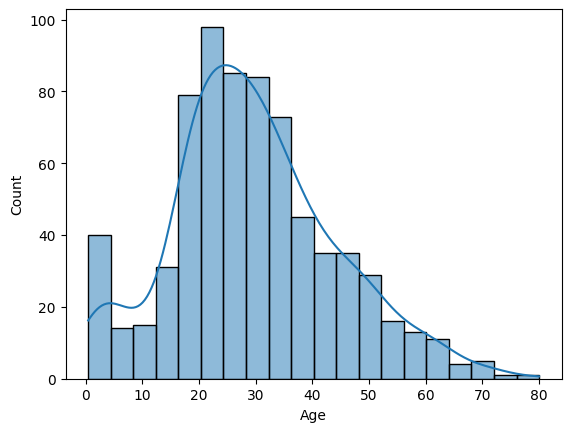

In [ ]:
sns.histplot(titanic_df['Age'], kde=True)
plt.show()

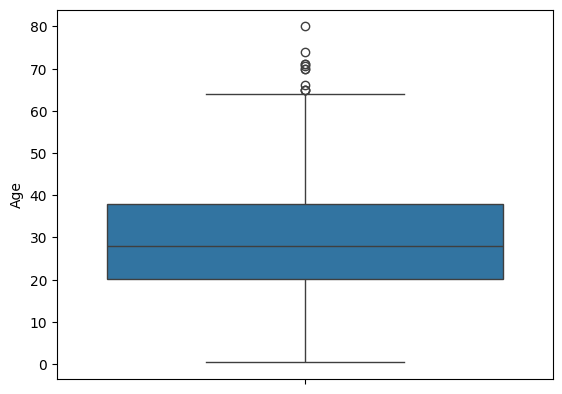

In [ ]:
sns.boxplot(titanic_df['Age'])
plt.show()

There are outliers in the Age column, so median imputation is better for it.

In [ ]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

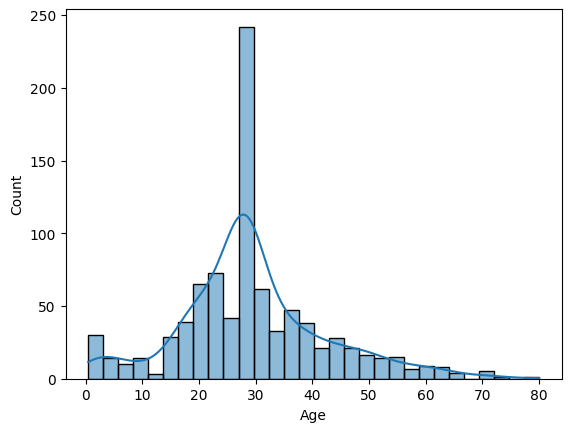

In [ ]:
sns.histplot(titanic_df['Age'], kde=True)
plt.show()

In [ ]:
titanic_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Now there are only 2 missing values in the dataset, it is better to drop these.

In [ ]:
titanic_df.dropna(inplace=True)

In [ ]:
titanic_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Now there are no missing values in the dataset.

In [ ]:
titanic_df.nunique()

,0
PassengerId,889
Survived,2
Pclass,3
Name,889
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,680
Fare,247


'Survived', 'Pclass', 'SibSp', 'Parch, and 'Embarked' are categorical variables.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
cat_cols=['Sex', 'Embarked']
num_cols = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
preprocessor = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),num_cols),
        ('cat',OneHotEncoder(),cat_cols)
    ]
)


In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [ ]:
X_titanic = titanic_df.drop('Survived', axis=1)
y_titanic = titanic_df['Survived']

In [ ]:
X_titanic_train, X_titanic_test, y_titanic_train, y_titanic_test = train_test_split(X_titanic, y_titanic, test_size=0.3)
pipeline.fit(X_titanic_train, y_titanic_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Fare', 'Pclass',
                                                   'SibSp', 'Parch']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', LogisticRegression())])

In [ ]:
y_titanic_pred = pipeline.predict_proba(X_titanic_test)[:, 1]

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
print(f"ROC-AUC score of the model is {roc_auc_score(y_titanic_test, y_titanic_pred)}")

ROC-AUC score of the model is 0.8372455089820359


# Classifying Emails as Spam Using Decision Trees

In [ ]:
from google.colab import files
files.upload()

In [ ]:
email_df = pd.read_csv('emails.csv')
email_df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
email_df.isna().sum()

,0
text,0
spam,0


There are no missing values in the dataset.

In [ ]:
y_email = email_df['spam']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_email = vectorizer.fit_transform(email_df['text'])

In [ ]:
DT_email_model = DecisionTreeClassifier()
train_and_evaluate(DT_email_model, X_email, y_email)

Accuracy of the DecisionTreeClassifier() is: 95.52%
Recall of the DecisionTreeClassifier() is: 95.52%
Precision of the DecisionTreeClassifier() is: 95.52%
F1 Score of the DecisionTreeClassifier() is: 95.52%


# Predicting Customer Satisfaction Using Logistic Regression

In [2]:
from google.colab import files
files.upload()

Saving Customer-survey-data.csv to Customer-survey-data.csv


{'Customer-survey-data.csv': b'Customer ID,Overall Delivery Experience (Rating),Food Quality (Rating),Speed of Delivery (Rating),Order Accuracy\r\n1,5,3,4,Yes\r\n2,3,4,3,Yes\r\n3,4,5,2,Yes\r\n4,5,3,4,Yes\r\n5,2,5,1,Yes\r\n6,5,2,5,Yes\r\n7,1,4,3,Yes\r\n8,3,3,2,No\r\n9,5,1,3,Yes\r\n10,3,5,3,No\r\n11,5,3,4,Yes\r\n12,2,2,5,Yes\r\n13,4,5,3,No\r\n14,3,4,2,Yes\r\n15,1,5,1,Yes\r\n16,5,4,5,Yes\r\n17,2,2,4,Yes\r\n18,4,5,4,No\r\n19,5,1,5,Yes\r\n20,2,4,4,Yes\r\n21,5,5,1,Yes\r\n22,3,3,3,No\r\n23,1,5,5,Yes\r\n24,5,4,4,Yes\r\n25,3,3,2,Yes\r\n26,2,3,4,Yes\r\n27,2,2,3,No\r\n28,4,5,4,Yes\r\n29,4,1,2,Yes\r\n30,3,4,5,Yes\r\n31,5,5,4,Yes\r\n32,3,3,4,No\r\n33,1,2,5,Yes\r\n34,5,5,1,Yes\r\n35,5,1,2,Yes\r\n36,2,3,3,Yes\r\n37,1,5,4,Yes\r\n38,5,4,3,Yes\r\n39,2,2,4,No\r\n40,3,3,2,Yes\r\n41,5,5,5,Yes\r\n42,3,3,3,Yes\r\n43,4,4,4,Yes\r\n44,5,5,5,Yes\r\n45,2,2,2,Yes\r\n46,5,5,5,Yes\r\n47,1,1,1,Yes\r\n48,3,3,3,No\r\n49,5,5,5,Yes\r\n50,3,3,3,No\r\n51,5,5,5,Yes\r\n52,2,2,2,Yes\r\n53,4,4,4,No\r\n54,3,3,3,Yes\r\n55,1,1,1,

In [3]:
customer_df = pd.read_csv('Customer-survey-data.csv')
customer_df.head()

,Customer ID,Overall Delivery Experience (Rating),Food Quality (Rating),Speed of Delivery (Rating),Order Accuracy
0,1,5.0,3.0,4.0,Yes
1,2,3.0,4.0,3.0,Yes
2,3,4.0,5.0,2.0,Yes
3,4,5.0,3.0,4.0,Yes
4,5,2.0,5.0,1.0,Yes


In [ ]:
customer_df.shape

(10616, 5)

In [4]:
customer_df.isna().sum()

,0
Customer ID,0
Overall Delivery Experience (Rating),418
Food Quality (Rating),252
Speed of Delivery (Rating),239
Order Accuracy,660


In [5]:
customer_df.nunique()

,0
Customer ID,10616
Overall Delivery Experience (Rating),5
Food Quality (Rating),5
Speed of Delivery (Rating),5
Order Accuracy,2


All the values (except Customer ID) are unique so it is better to impute these with their mode.

In [8]:
customer_df.dtypes

,0
Customer ID,int64
Overall Delivery Experience (Rating),float64
Food Quality (Rating),float64
Speed of Delivery (Rating),float64
Order Accuracy,object


In [9]:
customer_df['Overall Delivery Experience (Rating)'].fillna(customer_df['Overall Delivery Experience (Rating)'].mode()[0], inplace=True)
customer_df['Food Quality (Rating)'].fillna(customer_df['Food Quality (Rating)'].mode()[0], inplace=True)
customer_df['Speed of Delivery (Rating)'].fillna(customer_df['Speed of Delivery (Rating)'].mode()[0], inplace=True)
customer_df['Order Accuracy'].fillna(customer_df['Order Accuracy'].mode()[0], inplace=True)

In [10]:
customer_df.isna().sum()

,0
Customer ID,0
Overall Delivery Experience (Rating),0
Food Quality (Rating),0
Speed of Delivery (Rating),0
Order Accuracy,0


In [14]:
encoder = LabelEncoder()
customer_df['Order Accuracy'] = encoder.fit_transform(customer_df['Order Accuracy'])

In [15]:
customer_df.head()

,Customer ID,Overall Delivery Experience (Rating),Food Quality (Rating),Speed of Delivery (Rating),Order Accuracy
0,1,5.0,3.0,4.0,1
1,2,3.0,4.0,3.0,1
2,3,4.0,5.0,2.0,1
3,4,5.0,3.0,4.0,1
4,5,2.0,5.0,1.0,1


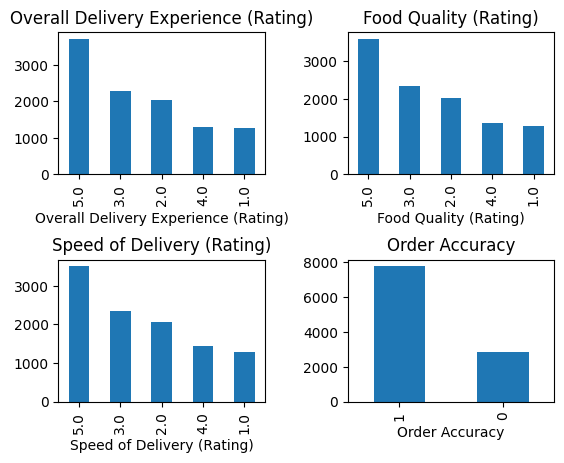

In [22]:
cols_to_plot = ['Overall Delivery Experience (Rating)',	'Food Quality (Rating)',	'Speed of Delivery (Rating)',	'Order Accuracy']
n_cols = int(len(cols_to_plot) / 2)
fig, axes = plt.subplots(2, n_cols)
axes = axes.flatten()
for i, col in enumerate(cols_to_plot):
  customer_df[col].value_counts().plot(kind='bar', ax=axes[i])
  axes[i].set_title(col)
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()

In [25]:
LR_model = LogisticRegression()

In [27]:
X_cust = customer_df.drop('Order Accuracy', axis=1)
y_cust = customer_df['Order Accuracy']

In [29]:
train_and_evaluate(LR_model, X_cust, y_cust)

Accuracy of the LogisticRegression() is: 73.66%
Recall of the LogisticRegression() is: 73.66%
Precision of the LogisticRegression() is: 73.66%
F1 Score of the LogisticRegression() is: 73.66%
